In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #charts
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
var = pd.read_csv("Churn_Modelling.csv")
var.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = var.copy()
data.shape

(10000, 14)

UNIVARIATE ANALYSIS

In [4]:
df_france = data.loc[data['Geography']=='France']
df_spain = data.loc[data['Geography']=='Spain']
df_germany = data.loc[data['Geography']=='Germany']

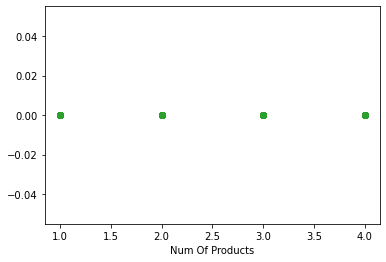

In [5]:
plt.plot(df_france['NumOfProducts'], np.zeros_like(df_france['NumOfProducts']),'o')
plt.plot(df_spain['NumOfProducts'], np.zeros_like(df_spain['NumOfProducts']),'o')
plt.plot(df_germany['NumOfProducts'], np.zeros_like(df_germany['NumOfProducts']),'o')
plt.xlabel('Num Of Products')
plt.show()

BIVARIATE ANALYSIS

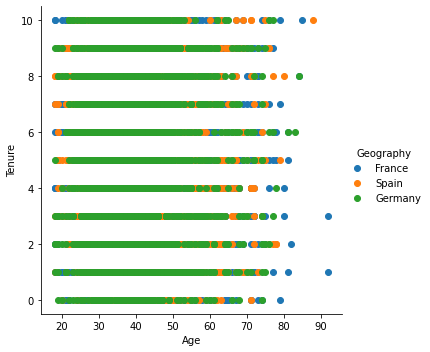

In [6]:
sns.FacetGrid(data,hue='Geography',height=5).map(plt.scatter,'Age','Tenure').add_legend();
plt.show()

MULTIVARIATE ANALYSIS

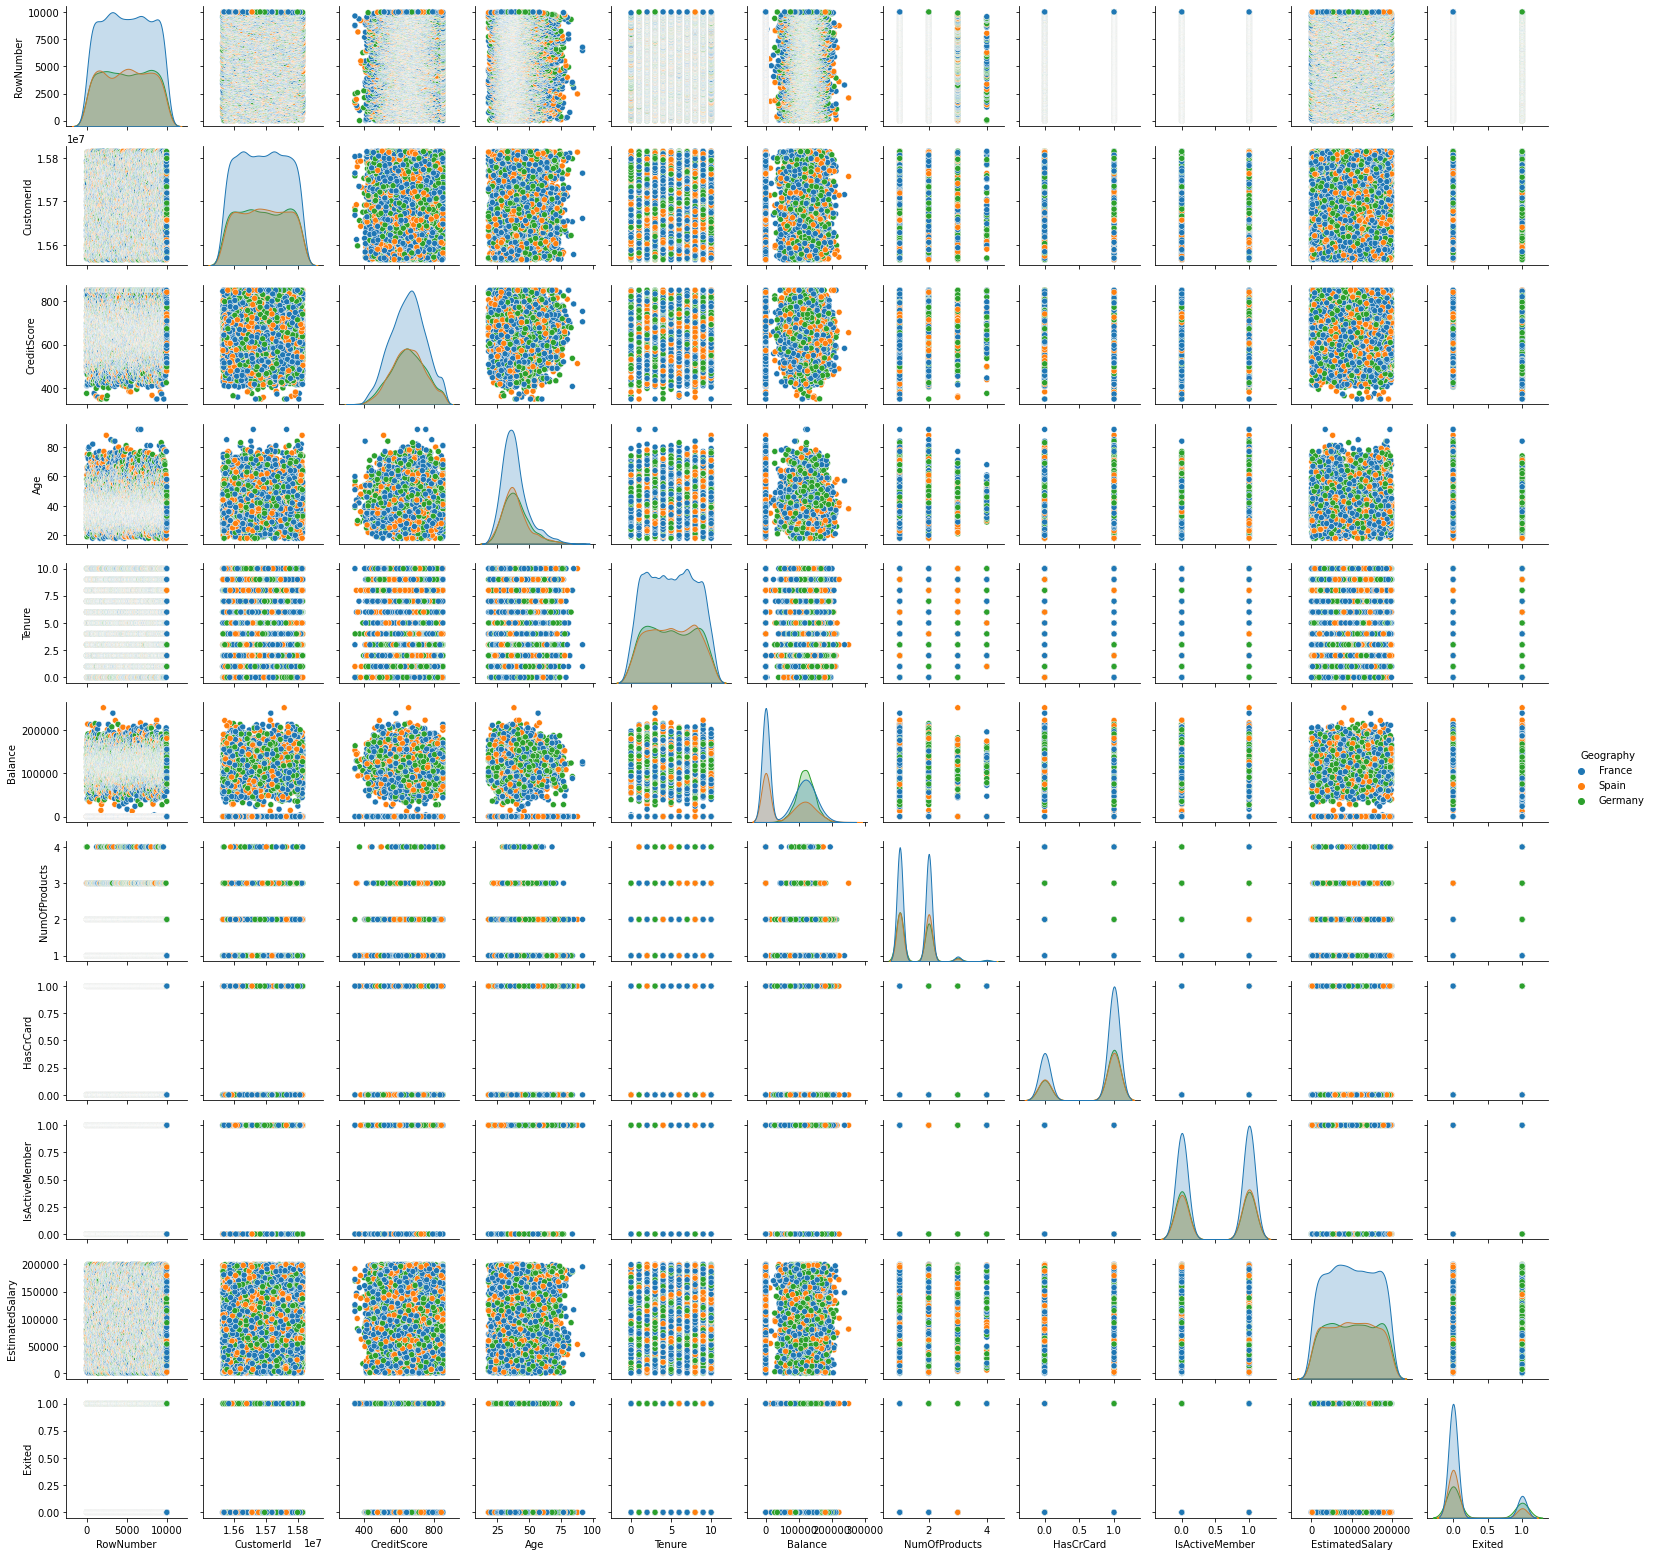

In [7]:
sns.pairplot(data,hue='Geography',height=2)

DESCRIPTIVE STATISTICS

In [8]:
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
var.shape

(10000, 14)

In [10]:
var.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
var.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

This means there are no NULL values in the dataset.

Giving Descriptive Statistics on CreditScore, Age and Balance

In [12]:
var["CreditScore"].mean()

650.5288

In [13]:
var["CreditScore"].median()

652.0

In [14]:
# CreditScore held by most of the people
CreditScore_tmp = pd.crosstab(index=var["CreditScore"], columns="count")
CreditScore_tmp.reset_index(inplace=True)
CreditScore_tmp[CreditScore_tmp['count'] == var.CreditScore.value_counts().max()]

col_0,CreditScore,count
459,850,233


In [15]:
var["Age"].mean()

38.9218

In [16]:
var["Age"].median()

37.0

In [17]:
# Age of most of the people
Age_temp = pd.crosstab(index=var["Age"], columns="count")
Age_temp.reset_index(inplace=True)
Age_temp[Age_temp['count'] == var.Age.value_counts().max()]

col_0,Age,count
19,37,478


In [18]:
var["Balance"].mean()

76485.88928799961

In [19]:
var["Balance"].median()

97198.54000000001

In [20]:
# Balance held by most of the people
Balance_temp = pd.crosstab(index=var["Balance"], columns="count")
Balance_temp.reset_index(inplace=True)
Balance_temp[Balance_temp['count'] == var.Balance.value_counts().max()]

col_0,Balance,count
0,0.0,3617


In [21]:
# Standard Deviation
pd.DataFrame(var.iloc[:,0:].std().to_frame()).T

C:\Users\badri\AppData\Local\Temp/ipykernel_6124/4070926830.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(var.iloc[:,0:].std().to_frame()).T


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2886.89568,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769


In [22]:
# Variance
pd.DataFrame(var.iloc[:,0:].var().to_frame()).T

C:\Users\badri\AppData\Local\Temp/ipykernel_6124/4274636292.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(var.iloc[:,0:].var().to_frame()).T


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8.334167e+06,5.174815e+09,9341.860157,109.994084,8.364673,3.893436e+09,0.338322,0.207791,0.249797,3.307457e+09,0.162223


In [23]:
#IQR
q1 = var["EstimatedSalary"].quantile(0.25)
q3 = var["EstimatedSalary"].quantile(0.75)
IQR=q3-q1
IQR

98386.1375

In [24]:
l1 = q1 - 1.5*IQR
l1

-96577.09624999999

In [25]:
l2 = q3 + 1.5*IQR
l2

296967.45375

All the values in the dataset are within the lower and upper limits of the IQR, and hence do not require replacment.

CHECKING CATEGORICAL COLUMNS

In [26]:
df_categorical = var[['Surname', 'Geography', 'Gender']]

In [27]:
df_categorical.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


Unique columns

In [28]:
print(var['Surname'].unique())
print(var['Geography'].unique())
print(var['Gender'].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


In [29]:
gender_encoder = LabelEncoder()
gender_encoder.fit(df_categorical['Gender'])

LabelEncoder()

In [30]:
gender_values = gender_encoder.transform(df_categorical['Gender'])
print("Before Encoding:", list(df_categorical['Gender'][-10:]))
print("After Encoding:", gender_values[-10:])

Before Encoding: ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female']
After Encoding: [1 0 1 1 0 1 1 0 1 0]


In [31]:
geo_encoder = OneHotEncoder()
geo_reshaped = np.array(df_categorical['Geography']).reshape(-1, 1)
geo_values = geo_encoder.fit_transform(geo_reshaped)
print(df_categorical['Geography'][:5])
print()
print(geo_values.toarray()[:5])
print()

0    France
1     Spain
2    France
3    France
4     Spain
Name: Geography, dtype: object

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]



In [32]:
sur_encoder = OneHotEncoder()
sur_reshaped = np.array(df_categorical['Surname']).reshape(-1, 1)
sur_values = sur_encoder.fit_transform(sur_reshaped)
print(df_categorical['Surname'][:5])
print()
print(sur_values.toarray()[:5])
print()

0    Hargrave
1        Hill
2        Onio
3        Boni
4    Mitchell
Name: Surname, dtype: object

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



In [33]:
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_encoded.head()

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df_numeric = var[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df_new = pd.concat([df_categorical_encoded, df_numeric], axis=1)
df_new.head()

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,0,0,0,0,0,...,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,0,0,0,0,0,0,0,...,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,0,0,0,0,0,0,0,...,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,0,0,0,0,0,0,0,...,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,0,0,0,0,0,0,0,...,15737888,850,43,2,125510.82,1,1,1,79084.10,0


SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [35]:
X = df_new.iloc[:, :-1].values
print(X)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [36]:
Y = df_new.iloc[:,-1].values
print(Y)

[1 0 1 ... 1 1 0]


SCALING INDEPENDENT VARIABLES

In [37]:
scale = StandardScaler().fit(X)
data_scaled = scale.transform(X)
print(data_scaled)

[[-0.0100005  -0.020004   -0.0100005  ...  0.64609167  0.97024255
   0.02188649]
 [-0.0100005  -0.020004   -0.0100005  ... -1.54776799  0.97024255
   0.21653375]
 [-0.0100005  -0.020004   -0.0100005  ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-0.0100005  -0.020004   -0.0100005  ... -1.54776799  0.97024255
  -1.00864308]
 [-0.0100005  -0.020004   -0.0100005  ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.0100005  -0.020004   -0.0100005  ...  0.64609167 -1.03067011
  -1.07636976]]


SPLIT DATA INTO TRAIN, TEST

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [39]:
print(X_train[:5])
print(X_test[:5])
print(y_train[:5])
print(y_test[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.0331574e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.1904310e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1343608e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 7.5609840e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.9144896e+05]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.9285267e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.2870210e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 7.5732250e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 8.9368590e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.3566217e+05]]
[0 1 0 0 1]
[0 1 0 0 0]
